<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#packages" data-toc-modified-id="packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>packages</a></span></li><li><span><a href="#true-model" data-toc-modified-id="true-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>true model</a></span></li><li><span><a href="#data" data-toc-modified-id="data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>data</a></span></li><li><span><a href="#plot" data-toc-modified-id="plot-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>plot</a></span></li><li><span><a href="#models" data-toc-modified-id="models-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>models</a></span><ul class="toc-item"><li><span><a href="#Linear-summary" data-toc-modified-id="Linear-summary-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Linear summary</a></span><ul class="toc-item"><li><span><a href="#Influential-values" data-toc-modified-id="Influential-values-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Influential values</a></span></li><li><span><a href="#Cook's-d-plot" data-toc-modified-id="Cook's-d-plot-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Cook's d plot</a></span></li><li><span><a href="#Predicted-values" data-toc-modified-id="Predicted-values-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Predicted values</a></span></li></ul></li><li><span><a href="#Logistic-summary" data-toc-modified-id="Logistic-summary-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Logistic summary</a></span><ul class="toc-item"><li><span><a href="#Influential-values" data-toc-modified-id="Influential-values-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Influential values</a></span></li><li><span><a href="#Cooks's-d-plot" data-toc-modified-id="Cooks's-d-plot-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Cooks's d plot</a></span></li><li><span><a href="#Predicted-values" data-toc-modified-id="Predicted-values-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Predicted values</a></span></li></ul></li><li><span><a href="#Raw-proportions-and-cell-sizes" data-toc-modified-id="Raw-proportions-and-cell-sizes-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Raw proportions and cell sizes</a></span></li><li><span><a href="#Logit-comparisons" data-toc-modified-id="Logit-comparisons-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Logit comparisons</a></span></li></ul></li><li><span><a href="#severity-effect" data-toc-modified-id="severity-effect-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>severity effect</a></span></li><li><span><a href="#treatment-effect" data-toc-modified-id="treatment-effect-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>treatment effect</a></span></li><li><span><a href="#interaction-effect" data-toc-modified-id="interaction-effect-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>interaction effect</a></span></li></ul></div>

# packages

In [308]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

# seaborn theme
sns.set(palette = "colorblind", font_scale = 1.5)

# true model

In [309]:
b0, b1, b2, b3 = 0.0, 0.5, 0.0, 1.0

# data

In [310]:
[x * 2 / 5 for x in [50, 150, 125, 175]]

[20.0, 60.0, 50.0, 70.0]

In [311]:
# 4 groups, unequal sample sizes
group = np.repeat(["minor - no treatment", "minor - treatment", "severe - no treatment", "severe - treatment"], repeats = [20, 60, 50, 70])

# severity labels
severity = np.asarray([{"minor - no treatment": "minor", "minor - treatment": "minor", "severe - no treatment": "severe", "severe - treatment": "severe"}[x] for x in group])

# severity effect
severity_effect = np.asarray([{"minor - no treatment": -0.5, "minor - treatment": -0.5, "severe - no treatment": 0.5, "severe - treatment": 0.5}[x] for x in group])

# treatment labels
treatment = np.asarray([{"minor - no treatment": "no treatment", "minor - treatment": "treatment", "severe - no treatment": "no treatment", "severe - treatment": "treatment"}[x] for x in group])

# treatment effect
treatment_effect = np.asarray([{"minor - no treatment": -0.5, "minor - treatment": 0.5, "severe - no treatment": -0.5, "severe - treatment": 0.5}[x] for x in group])

# interaction effect
interaction_effect = np.asarray([{"minor - no treatment": 0.5, "minor - treatment": -0.5, "severe - no treatment": -0.5, "severe - treatment": 0.5}[x] for x in group])

# response variable
y = np.random.binomial(n = 1, p = stats.logistic.cdf(b0 + b1 * severity_effect + b2 * treatment_effect + b3 * interaction_effect), size = np.sum([20, 60, 50, 70]))

# store in data frame
data_frame = pd.DataFrame({"y": y, "group": group, "severity": severity, "severity_effect": severity_effect, "treatment": treatment, "treatment_effect": treatment_effect, "interaction_effect": interaction_effect})

# see it
data_frame

,y,group,severity,severity_effect,treatment,treatment_effect,interaction_effect
0,1,minor - no treatment,minor,-0.5,no treatment,-0.5,0.5
1,1,minor - no treatment,minor,-0.5,no treatment,-0.5,0.5
2,1,minor - no treatment,minor,-0.5,no treatment,-0.5,0.5
3,1,minor - no treatment,minor,-0.5,no treatment,-0.5,0.5
4,1,minor - no treatment,minor,-0.5,no treatment,-0.5,0.5
...,...,...,...,...,...,...,...
195,1,severe - treatment,severe,0.5,treatment,0.5,0.5
196,1,severe - treatment,severe,0.5,treatment,0.5,0.5
197,1,severe - treatment,severe,0.5,treatment,0.5,0.5
198,0,severe - treatment,severe,0.5,treatment,0.5,0.5


# plot

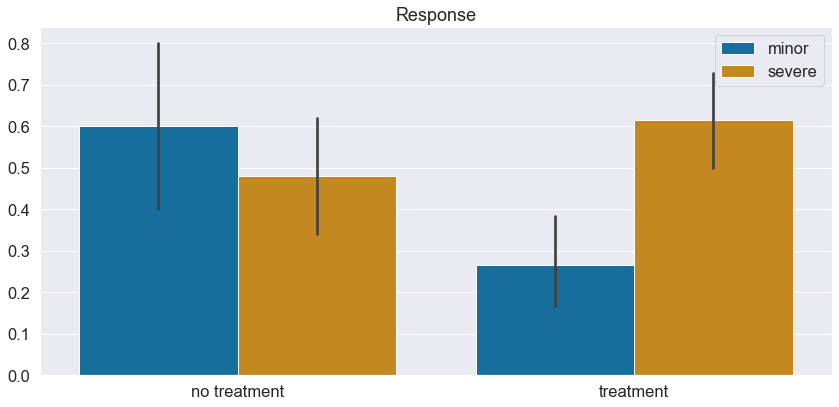

In [312]:
# figure size
plt.figure(figsize = (12, 6))

# barplot
sns.barplot(x = "treatment", y = "y", hue = "severity", data = data_frame)

# titles
plt.title("Response")
plt.xlabel(None)
plt.ylabel(None)

# legend
plt.legend(loc = "best")

# tighten plot
plt.tight_layout()

# models

In [313]:
# linear regression
linear_fit1 = smf.ols("y ~ severity_effect + treatment_effect + interaction_effect", data = data_frame).fit()

# logistic regression
logistic_fit1 = smf.glm("y ~ severity_effect + treatment_effect + interaction_effect", data = data_frame, family = sm.families.family.Binomial()).fit()

## Linear summary

In [314]:
linear_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     6.126
Date:                Sun, 16 Aug 2020   Prob (F-statistic):           0.000529
Time:                        09:27:22   Log-Likelihood:                -135.94
No. Observations:                 200   AIC:                             279.9
Df Residuals:                     196   BIC:                             293.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.4902      0.038     12.796      0.000       0.415       0.566
severity_effect        0.1138      0.077      1.485      0.139      -0.037       0.265
treatment_effect      -0.0995      0.077     -1.299      0.196      -0.251       0.052
interaction_effect     0.2338      0.077      3.051      0.003       0.083       0.385
==============================================================================
Omnibus:                     1781.768   Durbin-Watson:                   2.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.555
Skew:                           0.056   Prob(JB):                     1.27e-05
Kurtosis:                       1.359   Cond. No.                         3.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Influential values

In [315]:
linear_fit1.get_influence().summary_frame().sort_values("cooks_d", ascending = False)

,dfb_Intercept,dfb_severity_effect,dfb_treatment_effect,dfb_interaction_effect,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
15,-0.206391,0.206391,0.206391,-0.206391,0.021432,-1.276261,0.050000,-0.292794,-1.278324,-0.293268
5,-0.206391,0.206391,0.206391,-0.206391,0.021432,-1.276261,0.050000,-0.292794,-1.278324,-0.293268
6,-0.206391,0.206391,0.206391,-0.206391,0.021432,-1.276261,0.050000,-0.292794,-1.278324,-0.293268
7,-0.206391,0.206391,0.206391,-0.206391,0.021432,-1.276261,0.050000,-0.292794,-1.278324,-0.293268
19,-0.206391,0.206391,0.206391,-0.206391,0.021432,-1.276261,0.050000,-0.292794,-1.278324,-0.293268
...,...,...,...,...,...,...,...,...,...,...
37,-0.029440,0.029440,-0.029440,0.029440,0.001317,-0.557530,0.016667,-0.072584,-0.556548,-0.072456
38,-0.029440,0.029440,-0.029440,0.029440,0.001317,-0.557530,0.016667,-0.072584,-0.556548,-0.072456
41,-0.029440,0.029440,-0.029440,0.029440,0.001317,-0.557530,0.016667,-0.072584,-0.556548,-0.072456
42,-0.029440,0.029440,-0.029440,0.029440,0.001317,-0.557530,0.016667,-0.072584,-0.556548,-0.072456


### Cook's d plot

No handles with labels found to put in legend.


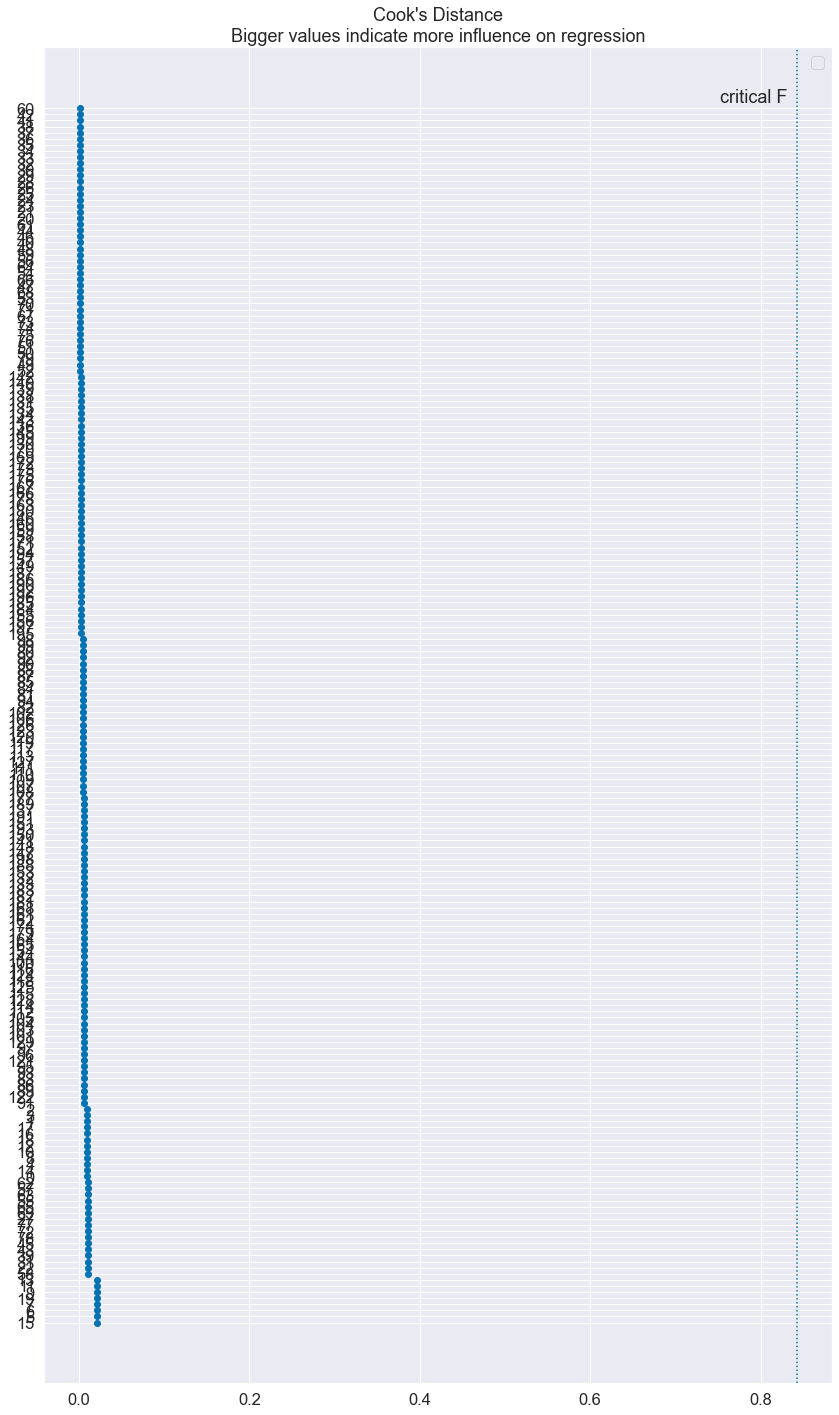

In [316]:
# figure size
plt.figure(figsize = (12, 20))

# cutoff line
plt.axvline(x = stats.f.ppf(q = 0.50, dfn = len(linear_fit1.params), dfd = linear_fit1.df_resid), linestyle = "dotted")
plt.annotate("critical F", xy = (stats.f.ppf(q = 0.50, dfn = len(linear_fit1.params) - 1.5, dfd = linear_fit1.df_resid), np.sum([20.0, 60.0, 50.0, 70.0])))

# lineplot
plt.scatter(linear_fit1.get_influence().summary_frame().sort_values("cooks_d", ascending = False)["cooks_d"], linear_fit1.get_influence().summary_frame().sort_values("cooks_d", ascending = False).index.map(str))

# titles
plt.title("Cook's Distance\nBigger values indicate more influence on regression")
plt.xlabel(None)
plt.ylabel(None)

# legend
plt.legend(loc = "best")

# tighten plot
plt.tight_layout()

### Predicted values

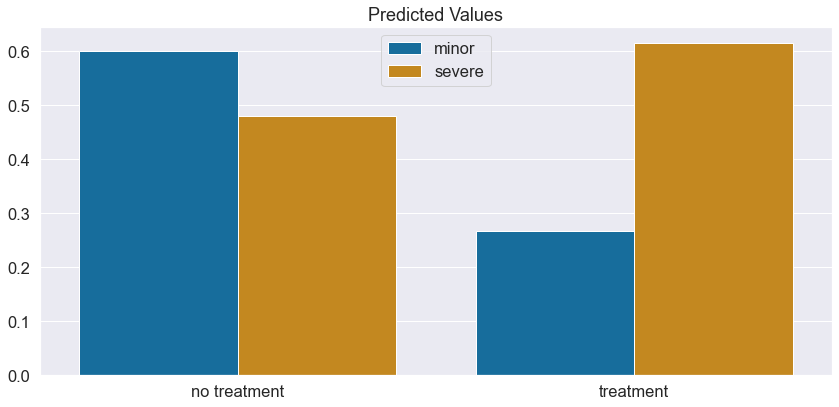

In [317]:
# figure size
plt.figure(figsize = (12, 6))

# barplot
sns.barplot(x = "treatment", y = linear_fit1.fittedvalues, hue = "severity", data = data_frame)

# titles
plt.title("Predicted Values")
plt.xlabel(None)
plt.ylabel(None)

# legend
plt.legend(loc = "best")

# tighten plot
plt.tight_layout()

## Logistic summary

In [318]:
logistic_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:                            GLM   Df Residuals:                      196
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -129.55
Date:                Sun, 16 Aug 2020   Deviance:                       259.10
Time:                        09:27:26   Pearson chi2:                     200.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0552      0.165     -0.335      0.737      -0.378       0.268
severity_effect        0.4957      0.329      1.505      0.132      -0.150       1.141
treatment_effect      -0.4358      0.329     -1.323      0.186      -1.081       0.210
interaction_effect     0.9812      0.329      2.979      0.003       0.336       1.627
======================================================================================
"""

### Influential values

In [319]:
logistic_fit1.get_influence().summary_frame().sort_values("cooks_d", ascending = False)

,dfb_Intercept,dfb_severity_effect,dfb_treatment_effect,dfb_interaction_effect,cooks_d,standard_resid,hat_diag,dffits_internal
13,-0.199733,0.199733,0.199733,-0.199733,0.020776,-1.256562,0.050000,-0.288275
19,-0.199733,0.199733,0.199733,-0.199733,0.020776,-1.256562,0.050000,-0.288275
5,-0.199733,0.199733,0.199733,-0.199733,0.020776,-1.256562,0.050000,-0.288275
6,-0.199733,0.199733,0.199733,-0.199733,0.020776,-1.256562,0.050000,-0.288275
7,-0.199733,0.199733,0.199733,-0.199733,0.020776,-1.256562,0.050000,-0.288275
...,...,...,...,...,...,...,...,...
54,-0.035084,0.035084,-0.035084,0.035084,0.001567,-0.608112,0.016667,-0.079169
47,-0.035084,0.035084,-0.035084,0.035084,0.001567,-0.608112,0.016667,-0.079169
33,-0.035084,0.035084,-0.035084,0.035084,0.001567,-0.608112,0.016667,-0.079169
59,-0.035084,0.035084,-0.035084,0.035084,0.001567,-0.608112,0.016667,-0.079169


### Cooks's d plot

No handles with labels found to put in legend.


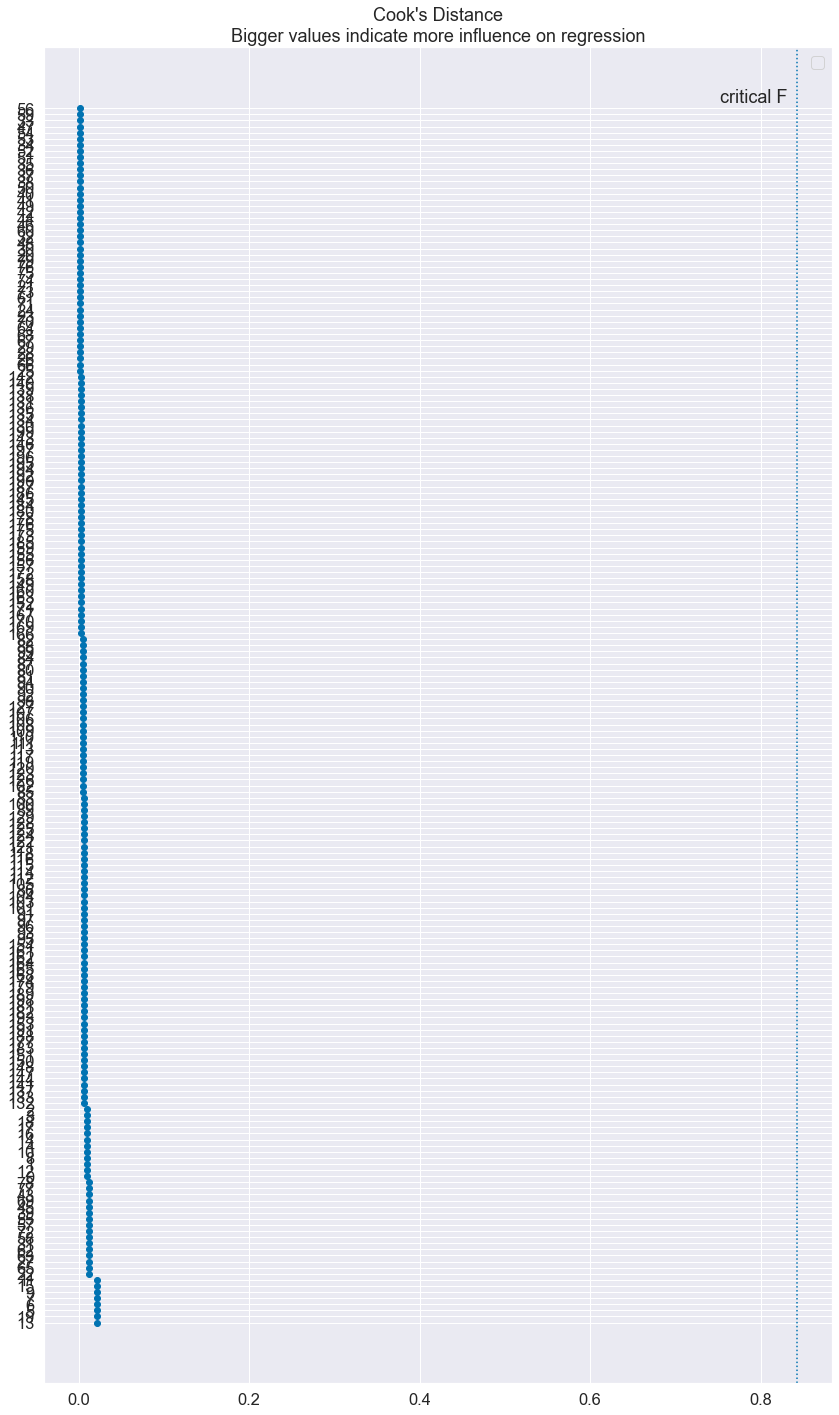

In [320]:
# figure size
plt.figure(figsize = (12, 20))

# cutoff line
# 
plt.axvline(x = stats.f.ppf(q = 0.50, dfn = len(logistic_fit1.params), dfd = linear_fit1.df_resid), linestyle = "dotted")
plt.annotate("critical F", xy = (stats.f.ppf(q = 0.50, dfn = len(logistic_fit1.params) - 1.5, dfd = linear_fit1.df_resid), np.sum([20.0, 60.0, 50.0, 70.0])))

# lineplot
plt.scatter(logistic_fit1.get_influence().summary_frame().sort_values("cooks_d", ascending = False)["cooks_d"], logistic_fit1.get_influence().summary_frame().sort_values("cooks_d", ascending = False).index.map(str))

# titles
plt.title("Cook's Distance\nBigger values indicate more influence on regression")
plt.xlabel(None)
plt.ylabel(None)

# legend
plt.legend(loc = "best")

# tighten plot
plt.tight_layout()

### Predicted values

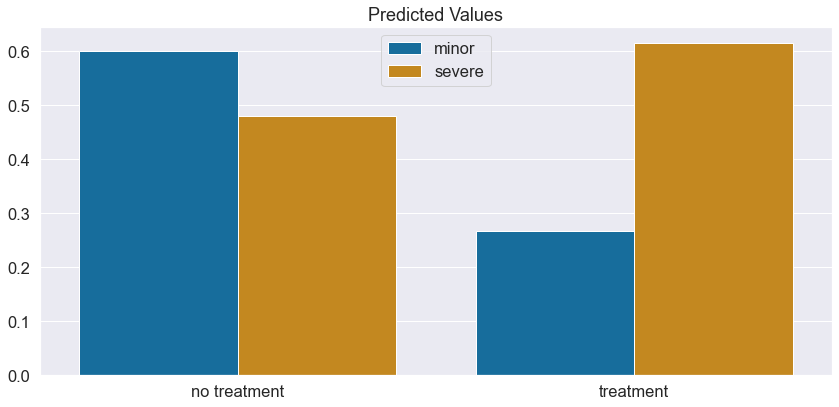

In [321]:
# figure size
plt.figure(figsize = (12, 6))

# barplot
sns.barplot(x = "treatment", y = logistic_fit1.fittedvalues, hue = "severity", data = data_frame)

# titles
plt.title("Predicted Values")
plt.xlabel(None)
plt.ylabel(None)

# legend
plt.legend(loc = "best")

# tighten plot
plt.tight_layout()

## Raw proportions and cell sizes

In [322]:
proportion_n_df = (data_frame.groupby(["severity", "treatment"])["y"]
                   .agg(["mean", lambda x: np.sum(~np.isnan(x))])
                   .rename(columns = {"<lambda_0>": "n", "mean": "p_hat"})
                   .reset_index()
                   .assign(severity_effect = lambda x: x["severity"].replace({"minor": -0.5, "severe": 0.5}),
                           treatment_effect = lambda x: x["treatment"].replace({"no treatment": -0.5, "treatment": 0.5}),
                           interaction_effect = [0.5, -0.5, -0.5, 0.5]))

# see it
proportion_n_df

,severity,treatment,p_hat,n,severity_effect,treatment_effect,interaction_effect
0,minor,no treatment,0.600000,20,-0.5,-0.5,0.5
1,minor,treatment,0.266667,60,-0.5,0.5,-0.5
2,severe,no treatment,0.480000,50,0.5,-0.5,-0.5
3,severe,treatment,0.614286,70,0.5,0.5,0.5


## Logit comparisons

In [323]:
def logit_test(p_hat, n, contrast, alpha = 0.05):
    """
    p_hat: vector of proportion estimates
    n: cell sizes for proportions
    contrast: contrast/comparison weights
    alpha: false positive error rate
    
    example:
    logit_test(p_hat = [0.60, 0.55, 0.55, 0.60], n = [102, 97, 100, 101], contrast = [1, -1, -1, 1], alpha = 0.05)
    
    """
    # logits
    logits = stats.logistic.ppf(np.asarray(p_hat))
    
    # variances for logits
    logit_var = 1 / (np.asarray(n) * np.asarray(p_hat) * (1 - np.asarray(p_hat)))
    
    # contrast estimate
    logit_contrast_hat = np.dot(logits, contrast)
    
    # standard error for the contrast
    logit_contrast_se = np.sqrt(np.sum(np.asarray(contrast) ** 2 * logit_var))
    
    # z-test
    z_stat = logit_contrast_hat / logit_contrast_se
    
    # p-value
    p_value_2tail = 2 * stats.norm.cdf(-np.abs(z_stat))
    
    # confidence intervals
    logit_contrast_lwr = logit_contrast_hat - stats.norm.ppf(1 - alpha / 2) * logit_contrast_se
    logit_contrast_upr = logit_contrast_hat + stats.norm.ppf(1 - alpha / 2) * logit_contrast_se
    
    return logit_contrast_hat, logit_contrast_se, z_stat, p_value_2tail, logit_contrast_lwr, logit_contrast_upr

# example
logit_test(p_hat = [0.60, 0.55, 0.55, 0.60], n = [102, 97, 100, 101], contrast = [1, -1, -1, 1], alpha = 0.05)

(0.4095888252920256,
 0.4051684698002408,
 1.0109099197525517,
 0.3120595458107882,
 -0.38452678318765093,
 1.2037044337717022)

# severity effect

In [324]:
logit_test(p_hat = proportion_n_df["p_hat"], n = proportion_n_df["n"], contrast = [-0.5, -0.5, 0.5, 0.5], alpha = 0.05)

(0.49572817279300646,
 0.3293864228301375,
 1.5050048770487736,
 0.13232282287015934,
 -0.14985735295054486,
 1.1413136985365577)

# treatment effect

In [325]:
logit_test(p_hat = proportion_n_df["p_hat"], n = proportion_n_df["n"], contrast = [-0.5, 0.5, -0.5, 0.5], alpha = 0.05)

(-0.43583003121193714,
 0.3293864228301375,
 -1.323157243298677,
 0.18578309153017347,
 -1.0814155569554884,
 0.20975549453161418)

# interaction effect

In [326]:
logit_test(p_hat = proportion_n_df["p_hat"], n = proportion_n_df["n"], contrast = [0.5, -0.5, -0.5, 0.5], alpha = 0.05)

(0.9812359885747071,
 0.3293864228301375,
 2.978981283271424,
 0.0028920844361644484,
 0.33565046283115574,
 1.6268215143182583)